In [1]:
import pandas as pd
df=pd.read_csv("dataset cenblue generic posts - with labels.csv")

<Axes: xlabel='labels'>

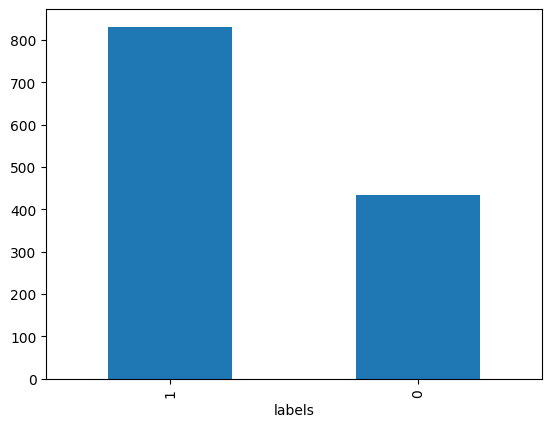

In [2]:
df['labels'].value_counts().plot(kind='bar')


<Axes: >

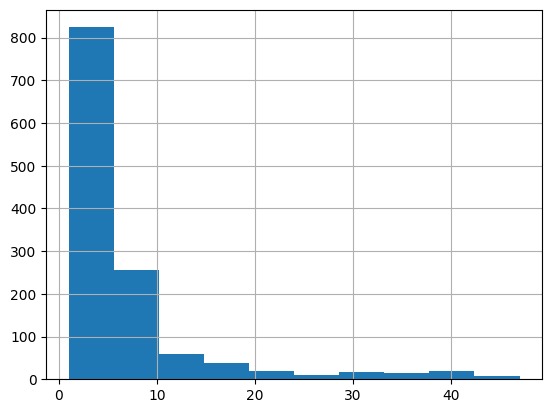

In [3]:
df['text_length'] = df['full_text'].apply(lambda x: len(x.split()))
df['text_length'].hist()


In [4]:
len(df)

1266

In [5]:
print(df['labels'].value_counts())
print(df['labels'].value_counts(normalize=True) * 100)

labels
1    831
0    435
Name: count, dtype: int64
labels
1    65.63981
0    34.36019
Name: proportion, dtype: float64


In [6]:
df['text_length_words'] = df['full_text'].apply(lambda x: len(str(x).split()))
df['text_length_chars'] = df['full_text'].apply(lambda x: len(str(x)))

print(df['text_length_words'].describe())

print(df['text_length_chars'].describe())

count    1266.000000
mean        7.267773
std         7.835272
min         1.000000
25%         4.000000
50%         5.000000
75%         7.000000
max        47.000000
Name: text_length_words, dtype: float64
count    1266.000000
mean       41.725908
std        47.849929
min         1.000000
25%        19.000000
50%        25.000000
75%        40.000000
max       245.000000
Name: text_length_chars, dtype: float64


In [7]:
from collections import Counter
import re
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\I Putu Nanda
[nltk_data]     Aditya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
def clean_and_tokenize(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    tokens = nltk.word_tokenize(text)
    return tokens

all_tokens = []
for text in df['full_text']:
    all_tokens.extend(clean_and_tokenize(str(text)))

word_counts = Counter(all_tokens)
print("\n=== 20 Kata paling sering muncul (semua label) ===")
for word, freq in word_counts.most_common(20):
    print(f"{word}: {freq}")


=== 20 Kata paling sering muncul (semua label) ===
ya: 223
banget: 175
sih: 124
ada: 123
itu: 116
yg: 113
ini: 108
ga: 93
juga: 85
aja: 82
aku: 81
bisa: 77
di: 76
yang: 74
gitu: 65
jadi: 63
dan: 59
sama: 54
udah: 54
bgt: 54


In [9]:
for label in df['labels'].unique():
    tokens = []
    subset = df[df['labels'] == label]
    for text in subset['full_text']:
        tokens.extend(clean_and_tokenize(str(text)))
    word_counts_label = Counter(tokens)
    print(f"\n=== 10 Kata paling sering di label {label} ===")
    for word, freq in word_counts_label.most_common(10):
        print(f"{word}: {freq}")


=== 10 Kata paling sering di label 0 ===
yg: 99
ada: 65
itu: 65
di: 56
dan: 55
ya: 49
ga: 46
aku: 39
aja: 37
baju: 35

=== 10 Kata paling sering di label 1 ===
ya: 174
banget: 145
sih: 103
ini: 75
ada: 58
juga: 56
bisa: 55
gitu: 54
itu: 51
ga: 47


In [10]:
from nltk import bigrams
all_bigrams = list(bigrams(all_tokens))
bigram_counts = Counter(all_bigrams)

print("\n=== 10 Bigram paling sering ===")
for bigram, freq in bigram_counts.most_common(10):
    print(f"{' '.join(bigram)}: {freq}")


=== 10 Bigram paling sering ===
ya allah: 27
banget sih: 21
soft spoken: 19
banget ya: 17
ada uletnya: 15
sih ya: 12
bener banget: 12
kisah nyata: 11
gitu ya: 11
ada yg: 10


In [11]:
print("\n=== Cek data missing ===")
print(df.isnull().sum())

print("\n=== Jumlah data duplikat ===")
print(df.duplicated().sum())


=== Cek data missing ===
full_text            0
labels               0
text_length          0
text_length_words    0
text_length_chars    0
dtype: int64

=== Jumlah data duplikat ===
3


In [12]:
avg_length_per_label = df.groupby('labels')['text_length_words'].mean()
print("\n=== Rata-rata panjang teks per label (dalam kata) ===")
print(avg_length_per_label)


=== Rata-rata panjang teks per label (dalam kata) ===
labels
0    11.521839
1     5.040915
Name: text_length_words, dtype: float64


In [13]:
df = df.drop_duplicates()

In [14]:
pip install Sastrawi

  Using cached Sastrawi-1.0.1-py2.py3-none-any.whl.metadata (909 bytes)
Using cached Sastrawi-1.0.1-py2.py3-none-any.whl (209 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [16]:
stemmer = StemmerFactory().create_stemmer()
stop_factory = StopWordRemoverFactory()
stopwords = set(stop_factory.get_stop_words())


In [17]:
def normalize_text(text):
    # Lowercase
    text = text.lower()
    # Hapus angka & tanda baca
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenisasi
    tokens = nltk.word_tokenize(text)
    # Hapus stopwords & stemming
    clean_tokens = [stemmer.stem(token) for token in tokens if token not in stopwords]
    return ' '.join(clean_tokens)

In [18]:
df['clean_text'] = df['full_text'].apply(lambda x: normalize_text(str(x)))

for i in range(5):
    print(f"\nTeks asli: {df['full_text'].iloc[i]}")
    print(f"Teks normalisasi: {df['clean_text'].iloc[i]}")


Teks asli: Dulu waktu ibuku meninggal keluarga juga banyak yg minta baju ibuku. Bahkan ada tante dari bapakku yg tiba-tiba pas acara kondangan pakai baju ibuku padahal bajunya punya banyak kenangan. Ternyata dia ngambil sendiri bajunya
Teks normalisasi: dulu waktu ibu tinggal keluarga banyak yg minta baju ibu bahkan tante bapak yg tibatiba pas acara kondangan pakai baju ibu padahal baju punya banyak kenang nyata ngambil sendiri baju

Teks asli: Dulu waktu nenekku meninggal juga adeknya minta tas nenekku pdhl nenek baru jg dikebumikan ya jelas ga dikasihlah sama mamakku karna dia yg beliin dan emg sodara2 nenekku hidupnya kek parasit semua
Teks normalisasi: dulu waktu nenek tinggal adeknya minta tas nenek pdhl nenek baru jg bumi jelas ga kasih sama mamak karna yg beliin emg sodara nenek hidup kek parasit semua

Teks asli: Gue saat kaka ipar meninggal nangis sejadi-jadinya even gue lakiÂ². Kakak perempuan gue satuÂ²nya jadi janda Dan ninggalin 2 orang anak. Gue sedih Karna beliau lebih 

In [19]:
df[['full_text', 'clean_text']].to_csv('teks_normalisasi.csv', index=False)


In [20]:
df

,full_text,labels,text_length,text_length_words,text_length_chars,clean_text
0,Dulu waktu ibuku meninggal keluarga juga banya...,0,34,34,224,dulu waktu ibu tinggal keluarga banyak yg mint...
1,Dulu waktu nenekku meninggal juga adeknya mint...,0,32,32,197,dulu waktu nenek tinggal adeknya minta tas nen...
2,Gue saat kaka ipar meninggal nangis sejadi-jad...,0,38,38,239,gue kaka ipar tinggal nang sejadijadinya even ...
3,Musuh terbesar dan teregois. Itu gak jauh dari...,0,19,19,111,musuh besar ego gak jauh bahkan keluarga yg al...
4,Dih ya suka-suka istrinya mau dikasih ke siapaa,0,8,8,47,dih sukasuka istri mau kasih siapaa
...,...,...,...,...,...,...
1261,akamsi yang kalo magrib disuruh emak ke mesjid...,1,9,9,50,akamsi kalo magrib suruh emak mesjid nih
1262,Akamsi punya kuasa,1,3,3,18,akamsi punya kuasa
1263,Apa itu jaket gropcore,0,4,4,22,apa jaket gropcore
1264,Jelas beda kak,1,3,3,14,jelas beda kak


In [22]:
pd.set_option('display.max_rows', None)

In [23]:
df['clean_text']

0       dulu waktu ibu tinggal keluarga banyak yg mint...
1       dulu waktu nenek tinggal adeknya minta tas nen...
2       gue kaka ipar tinggal nang sejadijadinya even ...
3       musuh besar ego gak jauh bahkan keluarga yg al...
4                     dih sukasuka istri mau kasih siapaa
5       jd inget dulu pas bapak ga hampir semua barang...
6       kak waktu ayah tinggal mirip gin klo ibu syuku...
7       kira baju org yg udah tinggal g yg mau pake ny...
8                                    ngerusak sendiri deh
9       sama jadi waktu tante tinggal orang emang suka...
10      tante kakak mama hari mama tinggal langsung mi...
11      baju cantik cantik bgt istri kakak cantik bgt ...
12      gw relate banget sih gw bom sanggup liat baran...
13      keluarga ibuk yg suka minta baju ipar nenek le...
14      nyokap tiri gw tinggal barang langsung diambil...
15      waktu nenek tinggal salah mantubesannya malah ...
16                     layak film dg story line ipar maut
17            

In [24]:
# 1. Hapus baris kosong
df = df[df['clean_text'].str.strip() != ""]

# 2. Hapus baris sangat pendek (≤2 kata)
df = df[df['clean_text'].str.split().str.len() > 2]

# 3. Hapus baris yang isinya link / URL
df = df[~df['clean_text'].str.contains(r'http|www|t\.co', regex=True)]

# 4. Hapus baris yang hanya berisi noise words (seperti 'rem', 'mk', 'lah', dst)
noise_keywords = ['rem', 'mk', 'lah', 'haha', 'wkwk', 'anjr', 'anjir', 'jir', 'loh', 'ih', 'hmm', 'yah', 
                  'waduh', 'wah', 'wow', 'loh', 'lah', 'rem', 'remmm', 'remmmmm', 'kak', 'ka']
df = df[~df['clean_text'].str.strip().isin(noise_keywords)]

# 5. Hapus baris yang hanya 1 kata meskipun panjang
df = df[df['clean_text'].str.split().str.len() > 1]

# 6. Hapus duplikat
df = df.drop_duplicates(subset=['clean_text'])

# 7. Reset index supaya rapi
df = df.reset_index(drop=True)

# 8. Cek hasil
print(f"✅ Jumlah data setelah dibersihkan: {len(df)}")
print("\n=== Contoh data bersih (10 random sample) ===")
print(df['clean_text'].sample(10, random_state=42).to_list())


✅ Jumlah data setelah dibersihkan: 1025

=== Contoh data bersih (10 random sample) ===
['udah jadi korbann ngajak adik sih asli tega banget', 'ga gitu sih', 'nada dikecilin mah tipes', 'tarik banget dah yaa', 'ngga punya akhlak emang', 'yaallah miris banget', 'kok lucu lihat spiderman nya', 'gmana mau kerja kalo ga bs interview', 'serah lu mau antem perang musuh semua orang dunia sama ibu lu sendiri rendah kalah patuh cuma baju murah bekas masa lawan ibu blog', 'easy peazy yaak']


In [25]:
df['clean_text']

0       dulu waktu ibu tinggal keluarga banyak yg mint...
1       dulu waktu nenek tinggal adeknya minta tas nen...
2       gue kaka ipar tinggal nang sejadijadinya even ...
3       musuh besar ego gak jauh bahkan keluarga yg al...
4                     dih sukasuka istri mau kasih siapaa
5       jd inget dulu pas bapak ga hampir semua barang...
6       kak waktu ayah tinggal mirip gin klo ibu syuku...
7       kira baju org yg udah tinggal g yg mau pake ny...
8                                    ngerusak sendiri deh
9       sama jadi waktu tante tinggal orang emang suka...
10      tante kakak mama hari mama tinggal langsung mi...
11      baju cantik cantik bgt istri kakak cantik bgt ...
12      gw relate banget sih gw bom sanggup liat baran...
13      keluarga ibuk yg suka minta baju ipar nenek le...
14      nyokap tiri gw tinggal barang langsung diambil...
15      waktu nenek tinggal salah mantubesannya malah ...
16                     layak film dg story line ipar maut
17            

In [26]:
df = df[df['clean_text'].str.strip() != ""]

df = df[df['clean_text'].str.split().str.len() > 2]

expression_patterns = [
    r'^(w(kw?)+)$',  # wkwk, wk, wkwkwk, etc.
    r'^(ha(ha)+)$',  # haha, hahaha, etc.
    r'^(anj(ir|ay|ayy)+)$',  # anjir, anjay, etc.
    r'^[a-z]{1,4}$',  # very short words only (1-4 letters)
    r'^(ya|ih|eh|loh|lah|waduh|weh|wow|hm|hmm|hmmm)+$',  # common expressions
    r'^(iya|nah|yah|uh|ah|oh|he|ehe|eee|hadeh|aduh)+$',  # more expressions
    r'^(astaga|astagfirullah|innalillahi|subhanallah|masyaallah)+$',  # religious
    r'^(anjay|banget|bgt|parah|serius|sabar|sedih)+$',  # common slang
    r'^(miris|tragis|gila|ngeri|kocak|kaget|shock)+$',  # more expressions
    r'^(buset|goblok|anjg|bangsat|tolol|kampret|bajingan)+$',  # vulgar words
    r'^(kontol|pepek|memek|ngentot)+$',  # more vulgar words
    r'^(anj|rem|ka|kak|dek|bro|sis|om|bang|bu|pak|ibu)+$',  # address terms
    r'^(bapak|mas|mbak|cewe|cowok|cowk|cewek)+$',  # more address terms
    r'^(woy|woi|kuy|plis|please|makasih|thanks|thankyou|ty)+$',  # phrases
    r'^(oke|ok|okey|okay|yah|iya|bet|kek|kayak|kayanya|kayaknya)+$',  # fillers
    r'^(bgt|banget|banyak|keren|bagus|hebat)+$',  # positive expressions
    r'^(wih|wow|wew|wehh|wek)+$',  # exclamations
    r'^(ckck)+$',  # tsk tsk sounds
    r'^(sip|mantap|mantul|cuy)+$',  # positive slang
    r'^(njir|anjir|jir)+$',  # common slang
    r'^(wle|wele|weleh)+$'  # more expressions
]

# Combine patterns with OR operator
combined_pattern = '|'.join(f'({pattern})' for pattern in expression_patterns)

# Filter out rows that match any of the patterns (case insensitive)
df = df[~df['clean_text'].str.lower().str.fullmatch(combined_pattern)]

In [27]:
def clean_more(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)  # hanya huruf dan spasi
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['clean_text'] = df['clean_text'].apply(clean_more)

In [28]:
df

,full_text,labels,text_length,text_length_words,text_length_chars,clean_text
0,Dulu waktu ibuku meninggal keluarga juga banya...,0,34,34,224,dulu waktu ibu tinggal keluarga banyak yg mint...
1,Dulu waktu nenekku meninggal juga adeknya mint...,0,32,32,197,dulu waktu nenek tinggal adeknya minta tas nen...
2,Gue saat kaka ipar meninggal nangis sejadi-jad...,0,38,38,239,gue kaka ipar tinggal nang sejadijadinya even ...
3,Musuh terbesar dan teregois. Itu gak jauh dari...,0,19,19,111,musuh besar ego gak jauh bahkan keluarga yg al...
4,Dih ya suka-suka istrinya mau dikasih ke siapaa,0,8,8,47,dih sukasuka istri mau kasih siapaa
5,Jd inget dulu pas bapak ga ada hampir semua ba...,0,39,39,238,jd inget dulu pas bapak ga hampir semua barang...
6,Kak waktu ayahku meninggal juga mirip gini. Kl...,0,41,41,239,kak waktu ayah tinggal mirip gin klo ibu syuku...
7,Kukira bajunya org yg udah meninggal g ada yg ...,0,19,19,100,kira baju org yg udah tinggal g yg mau pake ny...
8,ngerusak sendiri deh dia,1,4,4,24,ngerusak sendiri deh
9,sama kejadiannya waktu tanteku meninggal orang...,0,36,36,237,sama jadi waktu tante tinggal orang emang suka...


In [29]:
slang_dict = {
    'pdhl': 'padahal',
    'gk': 'tidak',
    'ga': 'tidak',
    'gak': 'tidak',
    'jg': 'juga',
    'yg': 'yang',
    'tdk': 'tidak',
    'aja': 'saja',
    'klo': 'kalau',
    'kl': 'kalau',
    'bgt': 'banget',
    'sih': '(partikel penekan)',
    'deh': '(partikel penekan)',
    'nih': 'ini',
    'dah': 'sudah',
    'emg': 'memang',
    'kyk': 'kayak',
    'ato': 'atau',
    'bkn': 'bukan',
    'skrg': 'sekarang',
    'dlu': 'dulu',
    'sm': 'sama',
    'kpn': 'kapan',
    'org': 'orang',
    'lg': 'lagi',
    'anjir': '(ekspresi kaget)',
    'wkwk': '(tawa)',
    'bjir': '(varian "anjir")',
    'akamsi': 'anak kecil',
    'nyeker': 'tanpa alas kaki',
    'santuy': 'santai',
    'cuy': 'bro',
    'anjay': '(ekspresi kagum)',
    'buset': '(ekspresi kaget)',
    'hoki': 'keberuntungan',
    'bner': 'benar',
    'trs': 'terus',
    'bngt': 'banget',
    'dgn': 'dengan',
    'kek': 'kayak',
    'jd': 'jadi',
    'emang': 'memang',
    'ebuset': 'buset',
    'sy': 'saya'
}

In [30]:
def replace_slang(text, slang_dict):
    words = text.split()
    return ' '.join([slang_dict.get(word, word) for word in words])

df['clean_text'] = df['clean_text'].apply(lambda x: replace_slang(x, slang_dict))

In [31]:
df['clean_text']

0       dulu waktu ibu tinggal keluarga banyak yang mi...
1       dulu waktu nenek tinggal adeknya minta tas nen...
2       gue kaka ipar tinggal nang sejadijadinya even ...
3       musuh besar ego tidak jauh bahkan keluarga yan...
4                     dih sukasuka istri mau kasih siapaa
5       jadi inget dulu pas bapak tidak hampir semua b...
6       kak waktu ayah tinggal mirip gin kalau ibu syu...
7       kira baju orang yang udah tinggal g yang mau p...
8                     ngerusak sendiri (partikel penekan)
9       sama jadi waktu tante tinggal orang memang suk...
10      tante kakak mama hari mama tinggal langsung mi...
11      baju cantik cantik banget istri kakak cantik b...
12      gw relate banget (partikel penekan) gw bom san...
13      keluarga ibuk yang suka minta baju ipar nenek ...
14      nyokap tiri gw tinggal barang langsung diambil...
15      waktu nenek tinggal salah mantubesannya malah ...
16                     layak film dg story line ipar maut
17            

In [45]:
stop_words = set(stopwords.words('indonesian'))
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [46]:
def advanced_normalize(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = nltk.word_tokenize(text)
    
    clean_tokens = []
    for token in tokens:
        if token not in stop_words:
            stemmed = stemmer.stem(token)
            if len(stemmed) > 2:
                clean_tokens.append(stemmed)
    return clean_tokens

df['tokens_clean'] = df['clean_text'].apply(lambda x: advanced_normalize(str(x)))


In [47]:
all_tokens = [token for tokens in df['tokens_clean'] for token in tokens]
token_freq = Counter(all_tokens)
rare_words = set([word for word, freq in token_freq.items() if freq < 2])

df['tokens_clean'] = df['tokens_clean'].apply(lambda tokens: [t for t in tokens if t not in rare_words])

In [50]:
df['clean_text_final'] = df['tokens_clean'].apply(lambda tokens: ' '.join(tokens))


In [51]:
df['clean_text_final']

0       tinggal keluarga baju tante pas pakai baju baj...
1       nenek tinggal adeknya tas nenek nenek kasih ka...
2       gue ipar tinggal nang gue laki kakak gue ningg...
3                                    musuh keluarga alami
4                                         dih istri kasih
5       inget pas barang beliau trus ambil barang dipa...
6       kak ayah tinggal gin barang ayah kasih orang t...
7       baju orang udah tinggal pake nyata baca bnyak ...
8                                          partikel tekan
9       tante tinggal orang suka barang bagus kerabat ...
10      tante kakak mama mama tinggal langsung baju al...
11      baju cantik cantik banget istri kakak cantik b...
12      banget partikel tekan bom sanggup liat barang ...
13      keluarga ibuk suka baju ipar nenek lepas ibuk ...
14      nyokap tinggal barang langsung kluarganya anak...
15      nenek tinggal salah ambil diem almh udh bahas ...
16                                              film ipar
17            

In [52]:
df = df[df['clean_text_final'].str.strip() != '']


In [53]:
df = df[df['clean_text_final'].str.split().str.len() > 2]


In [54]:
patterns = [
    r'^(partikel tekan|kak|min|ngerti|bagus|wahh bagus banget|kisah|cerita|film ipar|alas|ngalamin|ngalamin mmg sdh anak|kadang kenang|kenang kenang|wahh yaa cerita|iyaa partikel tekan kaya|gtu cerita nya|gtu alesannya|partikel tekan yaa|kadang alas nya|bagus banget|iya partikel tekan kaya|wahh bagus banget|ngerti|hmm ribet|hmm terima partikel tekan alesannya)$',
    r'^[a-z]{1,4}$'  # hanya satu kata pendek
]
combined_pattern = '|'.join(f'({p})' for p in patterns)

df = df[~df['clean_text_final'].str.lower().str.fullmatch(combined_pattern)]

In [55]:
df = df.reset_index(drop=True)


In [56]:
df['clean_text_final']

0      tinggal keluarga baju tante pas pakai baju baj...
1      nenek tinggal adeknya tas nenek nenek kasih ka...
2      gue ipar tinggal nang gue laki kakak gue ningg...
3                                   musuh keluarga alami
4                                        dih istri kasih
5      inget pas barang beliau trus ambil barang dipa...
6      kak ayah tinggal gin barang ayah kasih orang t...
7      baju orang udah tinggal pake nyata baca bnyak ...
8      tante tinggal orang suka barang bagus kerabat ...
9      tante kakak mama mama tinggal langsung baju al...
10     baju cantik cantik banget istri kakak cantik b...
11     banget partikel tekan bom sanggup liat barang ...
12     keluarga ibuk suka baju ipar nenek lepas ibuk ...
13     nyokap tinggal barang langsung kluarganya anak...
14     nenek tinggal salah ambil diem almh udh bahas ...
15                       adeknya manipulatif aneh banget
16                                       asa buka thread
17     tetangga gituu teman ema

count    646.000000
mean       5.469040
std        3.927024
min        3.000000
25%        3.000000
50%        4.000000
75%        5.750000
max       28.000000
Name: text_len, dtype: float64


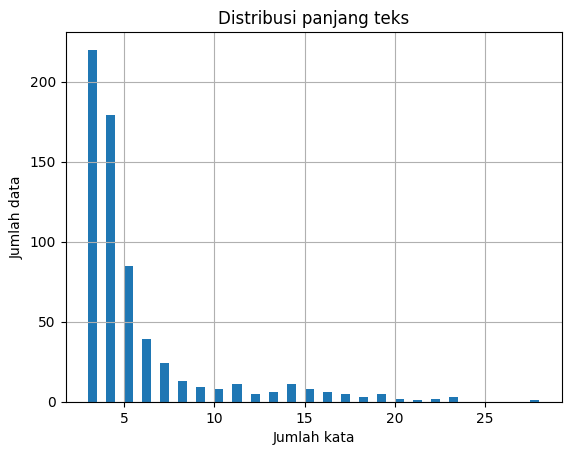

                                      clean_text_final
2    gue ipar tinggal nang gue laki kakak gue ningg...
20   dikit tinggal almarhum ayah ayah nyata tinggal...
24   gila alm bule tinggal keluarga suami bule udah...
29   kalo udah bener disumbangin orang butuh amanah...
43   bunda tinggal krn darah otak tante ayah nanyai...
64   hmm gua tau partikel tekan gua partikel tekan ...
389  yok normalisasi bunuh maling bakar jgn dilepas...


In [57]:
# Cek panjang teks
df['text_len'] = df['clean_text_final'].str.split().str.len()

# Deskripsi
print(df['text_len'].describe())

# Lihat distribusi
import matplotlib.pyplot as plt
df['text_len'].hist(bins=50)
plt.title('Distribusi panjang teks')
plt.xlabel('Jumlah kata')
plt.ylabel('Jumlah data')
plt.show()

# Lihat outlier ekstrem (contoh: > quantile 99%)
long_texts = df[df['text_len'] > df['text_len'].quantile(0.99)]
print(long_texts[['clean_text_final']])


In [58]:
threshold = df['text_len'].quantile(0.99)
df = df[df['text_len'] <= threshold]


In [59]:
df

,full_text,labels,text_length,text_length_words,text_length_chars,clean_text,tokens_clean,clean_text_final,text_len
0,Dulu waktu ibuku meninggal keluarga juga banya...,0,34,34,224,dulu waktu ibu tinggal keluarga banyak yang mi...,"[tinggal, keluarga, baju, tante, pas, pakai, b...",tinggal keluarga baju tante pas pakai baju baj...,11
1,Dulu waktu nenekku meninggal juga adeknya mint...,0,32,32,197,dulu waktu nenek tinggal adeknya minta tas nen...,"[nenek, tinggal, adeknya, tas, nenek, nenek, k...",nenek tinggal adeknya tas nenek nenek kasih ka...,12
3,Musuh terbesar dan teregois. Itu gak jauh dari...,0,19,19,111,musuh besar ego tidak jauh bahkan keluarga yan...,"[musuh, keluarga, alami]",musuh keluarga alami,3
4,Dih ya suka-suka istrinya mau dikasih ke siapaa,0,8,8,47,dih sukasuka istri mau kasih siapaa,"[dih, istri, kasih]",dih istri kasih,3
5,Jd inget dulu pas bapak ga ada hampir semua ba...,0,39,39,238,jadi inget dulu pas bapak tidak hampir semua b...,"[inget, pas, barang, beliau, trus, ambil, bara...",inget pas barang beliau trus ambil barang dipa...,13
6,Kak waktu ayahku meninggal juga mirip gini. Kl...,0,41,41,239,kak waktu ayah tinggal mirip gin kalau ibu syu...,"[kak, ayah, tinggal, gin, barang, ayah, kasih,...",kak ayah tinggal gin barang ayah kasih orang t...,10
7,Kukira bajunya org yg udah meninggal g ada yg ...,0,19,19,100,kira baju orang yang udah tinggal g yang mau p...,"[baju, orang, udah, tinggal, pake, nyata, baca...",baju orang udah tinggal pake nyata baca bnyak ...,9
8,sama kejadiannya waktu tanteku meninggal orang...,0,36,36,237,sama jadi waktu tante tinggal orang memang suk...,"[tante, tinggal, orang, suka, barang, bagus, k...",tante tinggal orang suka barang bagus kerabat ...,16
9,Tanteku (kakak mama) 2 hari setelah mama menin...,0,39,39,233,tante kakak mama hari mama tinggal langsung mi...,"[tante, kakak, mama, mama, tinggal, langsung, ...",tante kakak mama mama tinggal langsung baju al...,20
10,Bajunya cantik cantik bgt pasti istrinya kakak...,0,11,11,70,baju cantik cantik banget istri kakak cantik b...,"[baju, cantik, cantik, banget, istri, kakak, c...",baju cantik cantik banget istri kakak cantik b...,9


labels
1    404
0    235
Name: count, dtype: int64


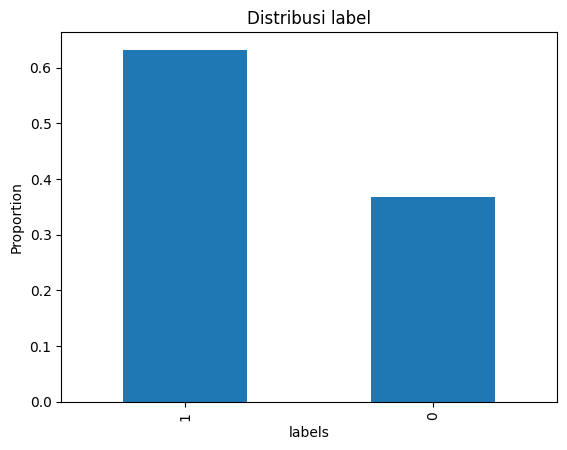

In [60]:
print(df['labels'].value_counts())
df['labels'].value_counts(normalize=True).plot(kind='bar')
plt.title('Distribusi label')
plt.ylabel('Proportion')
plt.show()


In [61]:
df['text_len'] = df['clean_text_final'].str.split().str.len()

# Statistik deskriptif
print("=== Statistik panjang teks ===")
print(df['text_len'].describe())

# Cek outlier: contoh ambil data yang sangat panjang (misalnya > quantile 99%)
threshold = df['text_len'].quantile(0.99)
long_texts = df[df['text_len'] > threshold]

print(f"\nJumlah data dengan panjang teks > quantile 99% (>{threshold} kata): {len(long_texts)}")
print("\nContoh data yang panjang sekali:")
for i, row in long_texts.head(5).iterrows():
    print(f"- [{i}] {row['clean_text_final']} (jumlah kata: {row['text_len']})")

# Jika ada kolom label, cek imbalance
if 'labels' in df.columns:
    print("\n=== Distribusi label ===")
    print(df['labels'].value_counts())
    print("\n=== Distribusi label (persentase) ===")
    print(df['labels'].value_counts(normalize=True) * 100)
else:
    print("\nKolom 'label' tidak ditemukan, jadi tidak dicek imbalance.")

=== Statistik panjang teks ===
count    639.000000
mean       5.275430
std        3.475288
min        3.000000
25%        3.000000
50%        4.000000
75%        5.000000
max       20.000000
Name: text_len, dtype: float64

Jumlah data dengan panjang teks > quantile 99% (>18.620000000000005 kata): 7

Contoh data yang panjang sekali:
- [9] tante kakak mama mama tinggal langsung baju almarhumah mukena cantik beliin mukena udah incer mama sakit saudara mikir orang otak (jumlah kata: 20)
- [19] udah kubur nenek gue barang udah jual nenek mama gue anak lemari sampe tas nenek gue ditanyain dipake engga (jumlah kata: 19)
- [65] almarhum bokap tinggal bnyk orang keluarga kerabat rumah barang almarhum baju sepatu bokap bermerk gua anak tau udh ambilin (jumlah kata: 19)
- [110] mama banget sayur suka brokoli beli mulu brokoli tuh harga mahal sayur tawa gasuka partikel tekan kalo pas makan (jumlah kata: 19)
- [257] kalo pinter kalimat atur well spoken kalo soft spoken pelan ngomongnya cuman suara 

In [62]:
df_clean = df[df['text_len'] <= threshold].copy()

In [63]:
print(f"\nJumlah data setelah hapus outlier: {len(df_clean)} (dari total {len(df)})")



Jumlah data setelah hapus outlier: 632 (dari total 639)


In [64]:
from sklearn.utils import resample


In [65]:
df_majority = df_clean[df_clean['labels'] == 1]
df_minority = df_clean[df_clean['labels'] == 0]


In [66]:
df_minority_oversampled = resample(
    df_minority,
    replace=True,                  # sampling dengan pengembalian
    n_samples=len(df_majority),    # jumlahnya samakan dengan majority
    random_state=42                # untuk reproducibility
)


In [67]:
df_balanced = pd.concat([df_majority, df_minority_oversampled])

In [68]:
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)


In [69]:
print("\n=== Distribusi label setelah oversampling ===")
print(df_balanced['labels'].value_counts())
print("\n=== Distribusi label persentase ===")
print(df_balanced['labels'].value_counts(normalize=True) * 100)


=== Distribusi label setelah oversampling ===
labels
0    404
1    404
Name: count, dtype: int64

=== Distribusi label persentase ===
labels
0    50.0
1    50.0
Name: proportion, dtype: float64


In [70]:
!pip install bertopic
!pip install sentence-transformers

  Using cached bertopic-0.17.3-py3-none-any.whl.metadata (24 kB)
  Using cached umap_learn-0.5.9.post2-py3-none-any.whl.metadata (25 kB)
  Using cached sentence_transformers-5.0.0-py3-none-any.whl.metadata (16 kB)
  Using cached pynndescent-0.5.13-py3-none-any.whl.metadata (6.8 kB)
Using cached bertopic-0.17.3-py3-none-any.whl (153 kB)
   ---------------------------------------- 0.0/732.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/732.2 kB ? eta -:--:--
   -------------- ------------------------- 262.1/732.2 kB ? eta -:--:--
   ---------------------------- ----------- 524.3/732.2 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 732.2/732.2 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/30.3 MB ? eta -:--:--
   ---------------------------------------- 0.3/30.3 MB ? eta -:--:--
    --------------------------------------- 0.5/30.3 MB 1.4 MB/s eta 0:00:22
   - -------------------------------------- 1.0/30.3 MB 2.0 MB/s eta 0


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [71]:
df = df_balanced.copy()

In [72]:
df

,full_text,labels,text_length,text_length_words,text_length_chars,clean_text,tokens_clean,clean_text_final,text_len
0,Tidak aneh namanya juga kampung mooooooooooooo...,0,15,15,97,aneh nama kampung mooooooooooooo sabar bu moga...,"[aneh, nama, kampung, sabar, moga, cepet, mati]",aneh nama kampung sabar moga cepet mati,7
1,Wkkw emang gede godaannya,1,4,4,25,wkkw memang gede goda,"[wkkw, gede, goda]",wkkw gede goda,3
2,tega banget ya rampoknya juga,1,5,5,29,tega banget rampok,"[tega, banget, rampok]",tega banget rampok,3
3,wkwk auto buka konter ini mah,1,6,6,29,(tawa) auto buka konter mah,"[tawa, auto, buka, mah]",tawa auto buka mah,4
4,Almarhum pakde punya banyak polo dan batik bag...,0,37,37,239,almarhum pakde punya banyak polo batik bagus s...,"[almarhum, polo, batik, bagus, rumah, beliau, ...",almarhum polo batik bagus rumah beliau almarhu...,14
5,Sy punya cerita jg... masalah barang2 peningga...,0,36,36,239,saya punya cerita juga masalah barang tinggal ...,"[cerita, barang, tinggal, tinggal, saudara, ad...",cerita barang tinggal tinggal saudara adek dpt...,12
6,ya ampun nyesek banget bacanya,1,5,5,30,ampun nyesek banget baca,"[ampun, banget, baca]",ampun banget baca,3
7,pusing pala gua mikirin kata kata buat intervi...,1,9,9,52,pusing pala gua mikirin kata kata buat intervi...,"[pusing, gua, mikirin, interview, pls]",pusing gua mikirin interview pls,5
8,ya allah jahat bgt ituuu ibunya keliatan susah...,0,10,10,62,allah jahat banget ituuu ibu liat susah diri p...,"[allah, jahat, banget, ituuu, liat, susah]",allah jahat banget ituuu liat susah,6
9,sama suka grogi banget kl interview,0,6,6,35,sama suka grogi banget kalau interview,"[suka, grogi, banget, interview]",suka grogi banget interview,4


In [73]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer

C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [74]:
texts =df['clean_text_final'].tolist()

In [75]:
from transformers import AutoTokenizer, AutoModel
import torch
model_name = "indobenchmark/indobert-base-p1"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)


In [76]:
model_name = "indobenchmark/indobert-base-p1"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

In [77]:
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0]  # ambil semua token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / \
           torch.clamp(input_mask_expanded.sum(1), min=1e-9)

In [78]:
class IndoBERTEmbeddings:
    def __init__(self, model, tokenizer):
        self.model = model
        self.tokenizer = tokenizer

    def encode(self, documents, batch_size=32, **kwargs):
        embeddings = []
        with torch.no_grad():
            for i in range(0, len(documents), batch_size):
                batch = documents[i:i+batch_size]
                encoded_input = self.tokenizer(batch, padding=True, truncation=True,
                                               return_tensors='pt', max_length=128)
                model_output = self.model(**encoded_input)
                pooled = mean_pooling(model_output, encoded_input['attention_mask'])
                embeddings.append(pooled.cpu().numpy())
        return np.vstack(embeddings)


In [79]:
df['clean_text_final'].tolist()

['aneh nama kampung sabar moga cepet mati',
 'wkkw gede goda',
 'tega banget rampok',
 'tawa auto buka mah',
 'almarhum polo batik bagus rumah beliau almarhum polo almarhum ukur beda almarhum baju almarhum',
 'cerita barang tinggal tinggal saudara adek dpt rumah tinggal isi kakak rumah',
 'ampun banget baca',
 'pusing gua mikirin interview pls',
 'allah jahat banget ituuu liat susah',
 'suka grogi banget interview',
 'ngeri banget kalo ulet',
 'astagaa sihh allah',
 'gapunya sisa baju disumbangin',
 'anjr ken baca beneran nyimak cerita',
 'bejir gila smpe laki',
 'baju gin gamau kenang',
 'inget cewe nya jual miris banget',
 'udah lihat video ngeri banget',
 'pake kepala orang',
 'iya pliss gagal interview mulu',
 'ngomong kasar nada nya rendah wkwkw',
 'brokoli tuh banget ekspresi kaget sumpah',
 'susah yaaa tawa',
 'ekspresi kaget hebat',
 'ngeri partikel tekan kalo ulet',
 'partikel tekan makan brokoli',
 'tawa santai make sendal',
 'ntu maling nya sholat doa nya allah kabul maling 

In [80]:
custom_embedder = IndoBERTEmbeddings(model, tokenizer)

topic_model = BERTopic(embedding_model=custom_embedder,
                       calculate_probabilities=True,
                       verbose=True)

In [81]:
topics, probs = topic_model.fit_transform(df['clean_text_final'].tolist())


2025-07-22 15:30:55,296 - BERTopic - Embedding - Transforming documents to embeddings.
Batches: 100%|█████████████████████████████████████████████████████████████████████████| 26/26 [00:07<00:00,  3.49it/s]
2025-07-22 15:31:10,468 - BERTopic - Embedding - Completed ✓
2025-07-22 15:31:10,468 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-07-22 15:31:43,588 - BERTopic - Dimensionality - Completed ✓
2025-07-22 15:31:43,633 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-07-22 15:31:43,801 - BERTopic - Cluster - Completed ✓
2025-07-22 15:31:43,821 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-07-22 15:31:43,871 - BERTopic - Representation - Completed ✓


In [82]:
print(topic_model.get_topic_info())

topic_model.visualize_topics()


   Topic  Count                             Name  \
0     -1     26          -1_trauma_sawi_gin_ulet   
1      0    649    0_banget_tekan_partikel_orang   
2      1     50   1_interview_kerja_tahap_banget   
3      2     25       2_soft_spoken_pelan_bilang   
4      3     13   3_cenblue_tolol_goblok_bangsat   
5      4     12       4_iya_suara_ngomong_lembut   
6      5     11      5_gagal_mulu_interview_cape   
7      6     11  6_disumbangin_smpe_gapunya_sisa   
8      7     11       7_pestisida_ulat_arti_ulet   

                                      Representation  \
0  [trauma, sawi, gin, ulet, gamau, dikecilin, gu...   
1  [banget, tekan, partikel, orang, baju, kak, ka...   
2  [interview, kerja, tahap, banget, tugas, pilih...   
3  [soft, spoken, pelan, bilang, dikecilin, nada,...   
4  [cenblue, tolol, goblok, bangsat, ladang, dija...   
5  [iya, suara, ngomong, lembut, suami, sumpah, t...   
6  [gagal, mulu, interview, cape, pliss, lamar, l...   
7  [disumbangin, smpe, gapunya,

In [83]:
pip install senticnet

Note: you may need to restart the kernel to use updated packages.
  Using cached senticnet-1.6-py3-none-any.whl.metadata (2.6 kB)


[notice] A new release of pip is available: 25.0.1 -> 25.1.1

Using cached senticnet-1.6-py3-none-any.whl (51.9 MB)

[notice] To update, run: python.exe -m pip install --upgrade pip

In [84]:
from senticnet.senticnet import SenticNet


In [85]:
sn = SenticNet()


In [86]:
def extract_sentic_features(text):
    tokens = nltk.word_tokenize(text.lower())
    polarity_scores = []

    for token in tokens:
        try:
            polarity = sn.polarity_value(token)
            polarity_scores.append(float(polarity))
        except Exception:
            continue

    if polarity_scores:
        avg_polarity = sum(polarity_scores) / len(polarity_scores)
        pos_count = sum(1 for p in polarity_scores if p > 0)
        neg_count = sum(1 for p in polarity_scores if p < 0)
    else:
        avg_polarity = 0.0
        pos_count = 0
        neg_count = 0

    return pd.Series({
        'avg_polarity': avg_polarity,
        'pos_count': pos_count,
        'neg_count': neg_count
    })


In [87]:
df[['avg_polarity', 'pos_count', 'neg_count']] = df['clean_text_final'].apply(lambda x: extract_sentic_features(str(x)))


In [88]:
print(df[['clean_text_final', 'avg_polarity', 'pos_count', 'neg_count']].head())


                                    clean_text_final  avg_polarity  pos_count  \
0            aneh nama kampung sabar moga cepet mati           0.0        0.0   
1                                     wkkw gede goda           0.0        0.0   
2                                 tega banget rampok           0.0        0.0   
3                                 tawa auto buka mah           0.0        0.0   
4  almarhum polo batik bagus rumah beliau almarhu...           0.0        0.0   

   neg_count  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        0.0  


In [89]:
indo_lexicon = {
    # Positif (+ sentiment)
    'bagus': 1.0, 'baik': 1.0, 'cantik': 1.0, 'keren': 1.0, 'hebat': 1.0,
    'lucu': 0.8, 'mantap': 1.0, 'senang': 1.0, 'suka': 0.9, 'indah': 1.0,
    'positif': 1.0, 'beruntung': 1.0, 'asik': 0.9, 'puas': 0.9, 'menarik': 0.8,
    'seru': 0.9, 'gokil': 0.7, 'keren': 1.0, 'mantul': 1.0, 'wow': 0.8,
    'cinta': 1.0, 'bahagia': 1.0, 'syukur': 1.0, 'bangga': 0.9, 'sukses': 1.0,
    'kagum': 0.8, 'sempurna': 1.0, 'legit': 0.7, 'gemesh': 0.7, 'anjay': 0.6,  # anjay bisa positif/negatif tergantung konteks
    'hoki': 0.8, 'untung': 0.9, 'jago': 0.8, 'top': 1.0, 'oke': 0.7,

    # Negatif (- sentiment)
    'jelek': -1.0, 'jahat': -1.0, 'buruk': -1.0, 'susah': -0.8, 'sedih': -0.9,
    'marah': -1.0, 'ngeri': -0.8, 'busuk': -1.0, 'bangsat': -1.0, 'goblok': -1.0,
    'kampret': -1.0, 'sial': -0.9, 'negatif': -1.0, 'benci': -1.0, 'parah': -0.8,
    'gila': -0.7, 'shock': -0.7, 'ampun': -0.6, 'stress': -0.9, 'jengkel': -0.8,
    'kecewa': -0.9, 'mampus': -1.0, 'celaka': -1.0, 'sakit': -0.8, 'bodoh': -1.0,
    'tolol': -1.0, 'bejat': -1.0, 'sinting': -1.0, 'bencana': -1.0, 'azab': -0.9,
    'musibah': -1.0, 'tragis': -1.0, 'trauma': -0.9, 'jahanam': -1.0, 'basi': -0.7,

    # Slang/Informal dengan bobot
    'anjir': -0.5,  # bisa negatif tapi tidak sekuat kata makian lain
    'bjir': -0.5,   # varian anjir
    'buset': -0.3,  # lebih ke ekspresi kaget
    'jir': -0.6,    # varian anjir
    'njir': -0.6,   # varian anjir
    'wkwk': 0.3,    # tawa (netral cenderung positif)
    'wkwkwk': 0.4,  # tawa lebih panjang
    'hahaha': 0.5,  # tawa positif
    'aduh': -0.4,   # ekspresi negatif ringan
    'duh': -0.3,    # ekspresi negatif ringan
    'astaga': -0.5, # ekspresi kaget negatif
    'yaelah': -0.4, # ekspresi kecewa
    'santuy': 0.3,  # santai (positif ringan)
    'gemoy': 0.6,   # lucu menggemaskan
    'mager': -0.3,  # malas gerak (negatif ringan)
    'cyin': 0.5,    # sayang (positif)
    'kuy': 0.4,     # ayo (positif)
    'yuk': 0.5,     # ayo (positif)
    'weh': 0.1,     # ekspresi (netral)
    'waduh': -0.3,  # ekspresi negatif ringan
    'hiks': -0.7,   # ekspresi sedih
    'huft': -0.3,   # ekspresi lelah
    'yha': -0.2,    # ekspresi kecewa ringan
    'sian': -0.6,   # kasihan
    'nyesek': -0.7, # sakit hati
    'baper': -0.4,  # bawa perasaan (negatif ringan)
    'gercep': 0.5,   # gerak cepat (positif)

        # Positif (+1.0 sampai +0.5)
    'memukau': 1.0,
    'mengesankan': 0.9,
    'fantastis': 1.0,
    'luar biasa': 1.0,
    'menakjubkan': 1.0,
    'cemerlang': 0.9,
    'gemilang': 0.9,
    'menyenangkan': 0.9,
    'harmonis': 0.8,
    'menghibur': 0.8,
    'inspiratif': 0.9,
    'memotivasi': 0.8,
    'menyegarkan': 0.7,
    'menentramkan': 0.8,
    'bersemangat': 0.8,
    'antusias': 0.7,
    'optimis': 0.7,
    'bangkit': 0.7,
    'berseri': 0.6,
    'ceria': 0.7,

    # Positif Informal/Slang
    'kekinian': 0.6,
    'chill': 0.5,
    'gercep': 0.7,
    'kinclong': 0.6,
    'kece': 0.8,
    'ngehits': 0.5,
    'viral': 0.4,
    'kudapan': 0.3,  # positif untuk konteks makanan
    'nyamleng': 0.7,  # Jawa: enak banget
    'jos': 0.6,  # Jawa: keren

    # Negatif (-1.0 sampai -0.5)
    'mengerikan': -1.0,
    'menyedihkan': -0.9,
    'menyebalkan': -0.9,
    'menghancurkan': -1.0,
    'mengganggu': -0.7,
    'mengecewakan': -0.9,
    'menakutkan': -0.8,
    'merusak': -0.9,
    'menindas': -1.0,
    'membosankan': -0.6,
    'menyakitkan': -0.9,
    'mematikan': -1.0,
    'menyesakkan': -0.8,
    'menyiksa': -1.0,
    'membingungkan': -0.5,
    'memalukan': -0.7,
    'merendahkan': -0.8,
    'menghina': -0.9,
    'mencoreng': -0.7,
    'meragukan': -0.5,

    # Negatif Informal/Slang
    'lemot': -0.5,  # lambat
    'gaje': -0.6,  # gak jelas
    'bete': -0.7,
    'mageran': -0.4,  # malas gerak
    'jaim': -0.3,  # jaga image
    'norak': -0.5,
    'kampungan': -0.6,
    'alay': -0.4,
    'garing': -0.3,
    'jadul': -0.2,  # jaman dulu (bisa netral/negatif tergantung konteks)

    # Netral dengan Potensi Emosional
    'netral': 0.0,
    'biasa': 0.0,
    'standar': 0.0,
    'wajar': 0.1,
    'lumayan': 0.3,
    'pas-pasan': -0.2,
    'sekadar': 0.0,
    'cukup': 0.2,
    'rata-rata': 0.0,

    # Ekspresi Khas
    'wih': 0.3,  # ekspresi kagum
    'lho': 0.0,  # netral
    'doh': -0.3,  # ekspresi frustasi
    'hmm': -0.1,  # ragu-ragu
    'ah': -0.2,  # ekspresi menolak
    'eh': 0.0,  # netral
    'ih': -0.3,  # jijik/negatif
    'duh': -0.2,  # ekspresi lelah
    'yuk': 0.5,  # ajakan positif
    'yoi': 0.4,  # setuju

    # Kata Kerja Emosional
    'mencintai': 1.0,
    'menyayangi': 1.0,
    'menghargai': 0.8,
    'mendukung': 0.7,
    'memuji': 0.8,
    'membenci': -1.0,
    'menghujat': -0.9,
    'mengkritik': -0.5,
    'menolak': -0.6,
    'memprotes': -0.5,

    # Kata Sifat Tambahan
    'ramah': 0.8,
    'hangat': 0.7,
    'tulus': 0.9,
    'ikhlas': 0.8,
    'dingin': -0.6,  # untuk sifat orang
    'kaku': -0.5,
    'palsu': -0.8,
    'sombong': -0.7,
    'arogan': -0.8
}

In [90]:
def extract_sentic_features_custom(text):
    tokens = nltk.word_tokenize(text.lower())
    scores = [indo_lexicon.get(token, 0.0) for token in tokens]
    if scores:
        avg_polarity = sum(scores) / len(scores)
        pos_count = sum(1 for s in scores if s > 0)
        neg_count = sum(1 for s in scores if s < 0)
    else:
        avg_polarity, pos_count, neg_count = 0.0, 0, 0
    return pd.Series({
        'avg_polarity': avg_polarity,
        'pos_count': pos_count,
        'neg_count': neg_count
    })

In [91]:
df[['avg_polarity', 'pos_count', 'neg_count']] = df['clean_text_final'].apply(
    lambda x: extract_sentic_features_custom(str(x))
)


In [92]:
df[['clean_text_final', 'avg_polarity', 'pos_count', 'neg_count']]


,clean_text_final,avg_polarity,pos_count,neg_count
0,aneh nama kampung sabar moga cepet mati,0.000000,0.0,0.0
1,wkkw gede goda,0.000000,0.0,0.0
2,tega banget rampok,0.000000,0.0,0.0
3,tawa auto buka mah,0.000000,0.0,0.0
4,almarhum polo batik bagus rumah beliau almarhu...,0.071429,1.0,0.0
5,cerita barang tinggal tinggal saudara adek dpt...,0.000000,0.0,0.0
6,ampun banget baca,-0.200000,0.0,1.0
7,pusing gua mikirin interview pls,0.000000,0.0,0.0
8,allah jahat banget ituuu liat susah,-0.300000,0.0,2.0
9,suka grogi banget interview,0.225000,1.0,0.0


In [93]:
df['tokens'] = df['clean_text_final'].apply(lambda x: x.split())

In [94]:
pip install mlxtend


[notice] A new release of pip is available: 25.0.1 -> 25.1.1



  Using cached mlxtend-0.23.4-py3-none-any.whl.metadata (7.3 kB)

[notice] To update, run: python.exe -m pip install --upgrade pip


Using cached mlxtend-0.23.4-py3-none-any.whl (1.4 MB)


In [95]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth, association_rules

In [96]:
te = TransactionEncoder()
te_ary = te.fit(df['tokens']).transform(df['tokens'])
df_trans = pd.DataFrame(te_ary, columns=te.columns_)

In [97]:
frequent_itemsets = fpgrowth(df_trans, min_support=0.02, use_colnames=True)
frequent_itemsets.sort_values('support', ascending=False, inplace=True)
print("\n=== Frequent Itemsets (FP-Growth) ===")
print(frequent_itemsets.head(10))


=== Frequent Itemsets (FP-Growth) ===
     support           itemsets
0   0.258663           (banget)
57  0.158416  (tekan, partikel)
28  0.158416         (partikel)
27  0.158416            (tekan)
18  0.075495            (orang)
6   0.073020        (interview)
13  0.071782             (kalo)
3   0.061881             (baju)
20  0.059406              (iya)
46  0.050743              (kak)


In [98]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
rules.sort_values('lift', ascending=False, inplace=True)
print("\n=== Association Rules ===")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))



=== Association Rules ===
           antecedents         consequents   support  confidence       lift
11            (spoken)              (soft)  0.028465    0.958333  32.263889
10              (soft)            (spoken)  0.028465    0.958333  32.263889
6           (ekspresi)             (kaget)  0.033416    0.964286  28.857143
7              (kaget)          (ekspresi)  0.033416    1.000000  28.857143
1           (partikel)             (tekan)  0.158416    1.000000   6.312500
0              (tekan)          (partikel)  0.158416    1.000000   6.312500
5           (partikel)     (tekan, banget)  0.034653    0.218750   6.312500
4              (tekan)  (banget, partikel)  0.034653    0.218750   6.312500
3   (banget, partikel)             (tekan)  0.034653    1.000000   6.312500
2      (tekan, banget)          (partikel)  0.034653    1.000000   6.312500


In [99]:
df[['clean_text_final', 'avg_polarity', 'pos_count', 'neg_count']]

,clean_text_final,avg_polarity,pos_count,neg_count
0,aneh nama kampung sabar moga cepet mati,0.000000,0.0,0.0
1,wkkw gede goda,0.000000,0.0,0.0
2,tega banget rampok,0.000000,0.0,0.0
3,tawa auto buka mah,0.000000,0.0,0.0
4,almarhum polo batik bagus rumah beliau almarhu...,0.071429,1.0,0.0
5,cerita barang tinggal tinggal saudara adek dpt...,0.000000,0.0,0.0
6,ampun banget baca,-0.200000,0.0,1.0
7,pusing gua mikirin interview pls,0.000000,0.0,0.0
8,allah jahat banget ituuu liat susah,-0.300000,0.0,2.0
9,suka grogi banget interview,0.225000,1.0,0.0


In [100]:
# Misalnya ini sudah kita punya sebelumnya:
embedding_model = AutoModel.from_pretrained("indolem/indobert-base-uncased")
tokenizer = AutoTokenizer.from_pretrained("indolem/indobert-base-uncased")

# Pastikan device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
embedding_model = embedding_model.to(device)

In [101]:
def get_indobert_embedding(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=128)
    inputs = {k: v.to(device) for k, v in inputs.items()}
    with torch.no_grad():
        outputs = embedding_model(**inputs)
        # Biasanya pakai mean pooling dari last_hidden_state
        last_hidden = outputs.last_hidden_state  # shape: [batch, seq_len, hidden]
        attention_mask = inputs['attention_mask']
        mask = attention_mask.unsqueeze(-1).expand(last_hidden.size()).float()
        masked_embeddings = last_hidden * mask
        summed = torch.sum(masked_embeddings, dim=1)
        summed_mask = torch.clamp(mask.sum(dim=1), min=1e-9)
        mean_pooled = summed / summed_mask
    return mean_pooled.squeeze().cpu().numpy()


In [102]:
embeddings_list = df['clean_text_final'].apply(get_indobert_embedding).tolist()

In [103]:
embeddings_df = pd.DataFrame(embeddings_list, columns=[f'embed_{i}' for i in range(len(embeddings_list[0]))])
df = pd.concat([df.reset_index(drop=True), embeddings_df], axis=1)

In [104]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings_list)

df['embed_pca_1'] = embeddings_2d[:,0]
df['embed_pca_2'] = embeddings_2d[:,1]

# Lihat contoh
print(df[['clean_text_final', 'embed_pca_1', 'embed_pca_2']].head())


                                    clean_text_final  embed_pca_1  embed_pca_2
0            aneh nama kampung sabar moga cepet mati    -4.813513    -3.077349
1                                     wkkw gede goda    -1.814712    -2.251219
2                                 tega banget rampok     5.715263     0.883082
3                                 tawa auto buka mah     4.514550     2.412201
4  almarhum polo batik bagus rumah beliau almarhu...     0.070308     1.298484


In [105]:
df

,full_text,labels,text_length,text_length_words,text_length_chars,clean_text,tokens_clean,clean_text_final,text_len,avg_polarity,...,embed_760,embed_761,embed_762,embed_763,embed_764,embed_765,embed_766,embed_767,embed_pca_1,embed_pca_2
0,Tidak aneh namanya juga kampung mooooooooooooo...,0,15,15,97,aneh nama kampung mooooooooooooo sabar bu moga...,"[aneh, nama, kampung, sabar, moga, cepet, mati]",aneh nama kampung sabar moga cepet mati,7,0.000000,...,1.085979,-0.521165,-0.224951,0.308564,-1.253247,-1.108140,-1.127623,0.431404,-4.813513,-3.077349
1,Wkkw emang gede godaannya,1,4,4,25,wkkw memang gede goda,"[wkkw, gede, goda]",wkkw gede goda,3,0.000000,...,1.229128,-1.516050,-0.052850,-0.026572,-0.452445,-0.831758,-0.393688,0.255632,-1.814712,-2.251219
2,tega banget ya rampoknya juga,1,5,5,29,tega banget rampok,"[tega, banget, rampok]",tega banget rampok,3,0.000000,...,-0.015907,-0.607853,-0.996329,0.436700,0.316056,-1.222223,-0.774732,0.312728,5.715263,0.883082
3,wkwk auto buka konter ini mah,1,6,6,29,(tawa) auto buka konter mah,"[tawa, auto, buka, mah]",tawa auto buka mah,4,0.000000,...,0.268062,-0.293844,-0.974115,-0.260579,-0.354944,-0.898511,-0.296711,0.796346,4.514550,2.412201
4,Almarhum pakde punya banyak polo dan batik bag...,0,37,37,239,almarhum pakde punya banyak polo batik bagus s...,"[almarhum, polo, batik, bagus, rumah, beliau, ...",almarhum polo batik bagus rumah beliau almarhu...,14,0.071429,...,0.966933,-0.747465,-1.949822,0.294399,-0.430499,-0.428523,-0.814469,0.506361,0.070308,1.298484
5,Sy punya cerita jg... masalah barang2 peningga...,0,36,36,239,saya punya cerita juga masalah barang tinggal ...,"[cerita, barang, tinggal, tinggal, saudara, ad...",cerita barang tinggal tinggal saudara adek dpt...,12,0.000000,...,1.074524,-0.388387,-0.873037,0.168631,-0.275183,-0.368205,-1.332979,1.160438,3.526914,-0.158419
6,ya ampun nyesek banget bacanya,1,5,5,30,ampun nyesek banget baca,"[ampun, banget, baca]",ampun banget baca,3,-0.200000,...,0.705079,-0.037365,-1.075306,-0.185438,-0.008303,-0.908411,0.313954,1.289244,5.580198,-0.133940
7,pusing pala gua mikirin kata kata buat intervi...,1,9,9,52,pusing pala gua mikirin kata kata buat intervi...,"[pusing, gua, mikirin, interview, pls]",pusing gua mikirin interview pls,5,0.000000,...,0.467023,-0.641197,-1.073388,-0.281581,-0.064667,-1.405831,-0.532486,0.626810,4.282708,-0.284932
8,ya allah jahat bgt ituuu ibunya keliatan susah...,0,10,10,62,allah jahat banget ituuu ibu liat susah diri p...,"[allah, jahat, banget, ituuu, liat, susah]",allah jahat banget ituuu liat susah,6,-0.300000,...,0.561217,-0.511150,-1.470448,0.499019,0.823553,-0.852395,0.217038,0.795832,3.578203,-0.153305
9,sama suka grogi banget kl interview,0,6,6,35,sama suka grogi banget kalau interview,"[suka, grogi, banget, interview]",suka grogi banget interview,4,0.225000,...,0.740785,-0.810770,-0.624961,0.960409,0.045201,-1.241198,-0.439330,0.995395,4.228739,0.487723


In [106]:
embed_cols = [f'embed_{i}' for i in range(768)]
pca = PCA(n_components=50, random_state=42)
X_pca = pca.fit_transform(df[embed_cols])

In [107]:
sentic_features = df[['avg_polarity', 'pos_count', 'neg_count']].values
import numpy as np
X_final = np.hstack([X_pca, sentic_features])

y = df['labels']

In [109]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [110]:
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.2, stratify=y, random_state=42
)

In [111]:
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

In [112]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.2]
}

grid = GridSearchCV(xgb, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

print("\n=== Best params ===")
print(grid.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits

=== Best params ===
{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100}


In [113]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [114]:
y_pred = grid.predict(X_test)

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

print("\n=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))

print("\n=== Accuracy ===")
print(f"{accuracy_score(y_test, y_pred):.4f}")


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.91      0.90      0.91        81
           1       0.90      0.91      0.91        81

    accuracy                           0.91       162
   macro avg       0.91      0.91      0.91       162
weighted avg       0.91      0.91      0.91       162


=== Confusion Matrix ===
[[73  8]
 [ 7 74]]

=== Accuracy ===
0.9074


In [117]:
import seaborn as sns

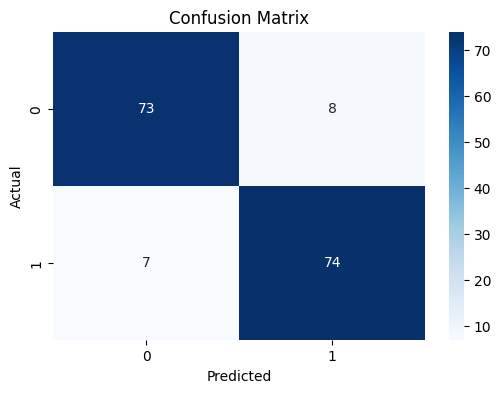

In [118]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [140]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [263]:
embed_cols = [f'embed_{i}' for i in range(768)]
sentic_cols = ['avg_polarity', 'pos_count', 'neg_count']

X = np.hstack([
    df[embed_cols].values,
    df[sentic_cols].values
])
y = df['labels'].values


In [264]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [265]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

In [300]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import regularizers

model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],),
          kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    Dense(1, activation='sigmoid')
])

In [301]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [326]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=1
)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9867 - loss: 0.2807 - val_accuracy: 0.8615 - val_loss: 0.7112
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9975 - loss: 0.2676 - val_accuracy: 0.8615 - val_loss: 0.7286
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9924 - loss: 0.2719 - val_accuracy: 0.8923 - val_loss: 0.6848
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9723 - loss: 0.3296 - val_accuracy: 0.8692 - val_loss: 0.6401
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9853 - loss: 0.3059 - val_accuracy: 0.8462 - val_loss: 0.6576
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9694 - loss: 0.3203 - val_accuracy: 0.8769 - val_loss: 0.6807
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9985 - loss: 0.2821 - val_accuracy: 0.8846 - val_loss: 0.6859
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9928 - loss: 0.2752 - val_accuracy: 0.

In [327]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\n✅ Test Accuracy: {acc:.4f}")

y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

test_log_loss = log_loss(y_test, y_pred_prob)
print(f"Test Log Loss: {test_log_loss:.4f}")




✅ Test Accuracy: 0.8704
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.87        81
           1       0.88      0.85      0.87        81

    accuracy                           0.87       162
   macro avg       0.87      0.87      0.87       162
weighted avg       0.87      0.87      0.87       162

Test Log Loss: 0.4584


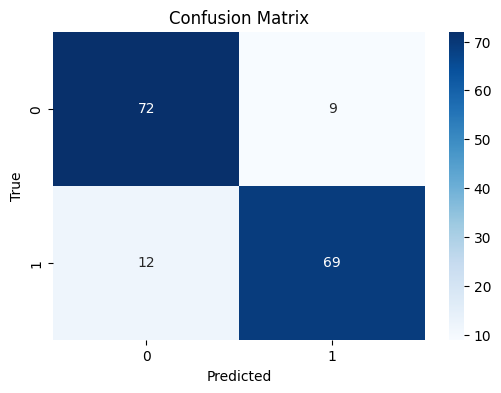

In [328]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()